In [13]:
data = [
    [2600, 3, 20, 550000],
    [3000, 4, 15, 565000],
    [3200, 2, 18, 610000],
    [4000, 3, 25, 765000],
    [2500, 3, 22, 525000],
    [3100, 4, 19, 575000],
]

In [5]:
data

[[2600, 3, 20, 550000],
 [3000, 4, 15, 565000],
 [3200, 18, 610000],
 [4000, 0, 3, 25, 765000],
 [2500, 3, 22, 525000],
 [3100, 4, 19, 575000]]

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
cloumn_headers = ["area", "bedrooms", "age", "price"]

In [15]:
# change the data to a pandas dataframe with the cloumns as cloumn_headers
df = pd.DataFrame(data, columns=cloumn_headers)

In [16]:
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,2,18,610000
3,4000,3,25,765000
4,2500,3,22,525000
5,3100,4,19,575000


<Axes: >

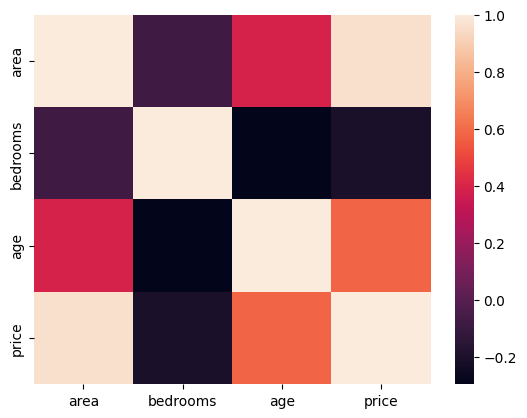

In [17]:
sns.heatmap(df.corr())

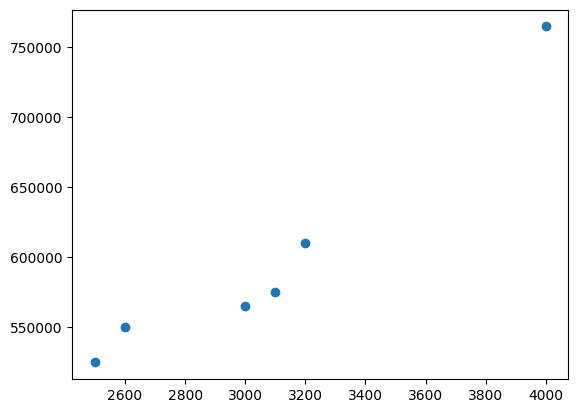

In [18]:
# plst a scatter plot of the data
plt.scatter(df.area, df.price)

In [19]:
from sklearn import linear_model


In [20]:
reg = linear_model.LinearRegression()

In [21]:
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [22]:
reg.coef_

array([  140.90285797, -8513.09901848,  5407.58516166])

In [23]:
reg.intercept_

85938.94341801218

In [24]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([699411.6267321])

In [25]:
reg.predict([[2500, 4, 5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([431181.61807159])

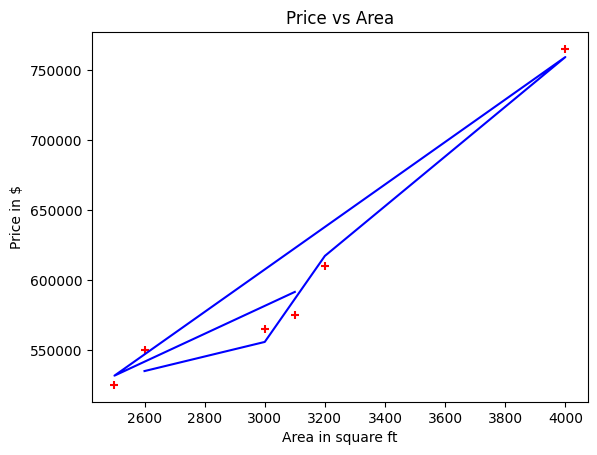

In [26]:
# can we plot the predictions and the intercept on the same line
# as the data?
%matplotlib inline
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area', 'bedrooms', 'age']]), color='blue')
plt.xlabel("Area in square ft")
plt.ylabel("Price in $")
plt.title("Price vs Area")
plt.show()

In [27]:
reg.predict([[3300, 3, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([530786.66281755])

In [28]:


# try ot use the workers scole and predict the salary


In [53]:

# Raw data
data = [
    [np.nan, 8.0, 9, 50000],
    [np.nan, 8.0, 6, 45000],
    ["five", 6.0, 7, 60000],
    ["two", 10.0, 10, 65000],
    ["seven", 9.0, 6, 70000],
    ["three", 7.0, 10, 62000],
    ["ten", np.nan, 7, 72000],
    ["eleven", 7.0, 8, 80000],
]

In [54]:
column_headers = ["experience", "test_score(out of 10)", "interview_score(out of 10)", "salary($)"]

In [55]:
df_new = pd.DataFrame(data, columns=column_headers)

In [56]:
df_new

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [57]:
df_new.experience = df_new.experience.fillna("zero")
df_new['test_score(out of 10)'] = df_new['test_score(out of 10)'].fillna(df_new['test_score(out of 10)'].mean())

In [58]:
df_new


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [51]:
#  turn the words in experience to digits
!pip install word2number

In [59]:
from word2number import w2n

df_new.experience = df_new.experience.apply(w2n.word_to_num)

In [60]:
df_new

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


<Axes: >

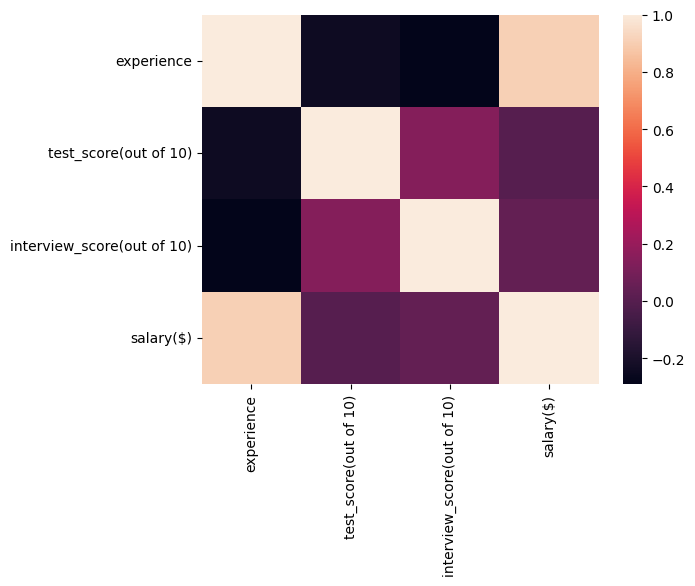

In [61]:
# plot a heatmap to see the correlation of the data
sns.heatmap(df_new.corr())

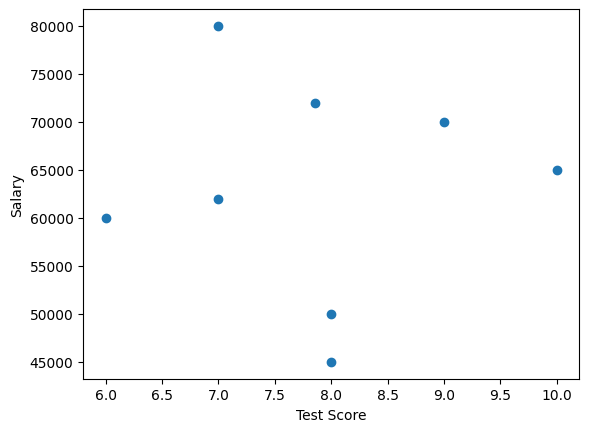

In [62]:
# plot the scatter plot of df_new
plt.scatter(df_new['test_score(out of 10)'], df_new['salary($)'])
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.show()


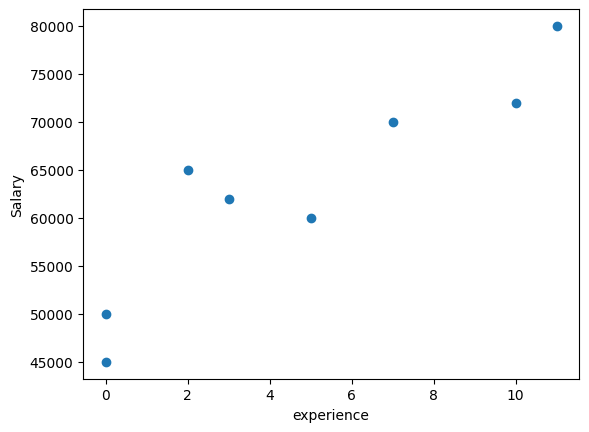

In [63]:
# plot the scatter plot of df_new
plt.scatter(df_new['experience'], df_new['salary($)'])
plt.xlabel('experience')
plt.ylabel('Salary')
plt.show()


In [64]:
reg2 = linear_model.LinearRegression()

reg2.fit(df_new[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df_new['salary($)'])

LinearRegression()

In [66]:
# make some predictions for the new empolyess
reg2.predict([[10, 9, 6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75911.9649046])